Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - loss: 0.1442 - val_loss: 0.0985
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 0.1175 - val_loss: 0.0750
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 0.0945 - val_loss: 0.0547
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - loss: 0.0747 - val_loss: 0.0373
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.0578 - val_loss: 0.0230
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.0439 - val_loss: 0.0122
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 0.0334 - val_loss: 0.0057
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 0.0272 - val_loss: 0.0045
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 0.0259 - val_loss: 0.0083
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.0294 - val_loss: 0.0139
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.0346 - val_loss: 0.0171
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 0.0377 - val_loss: 0.0167
Epoch 13/50
1

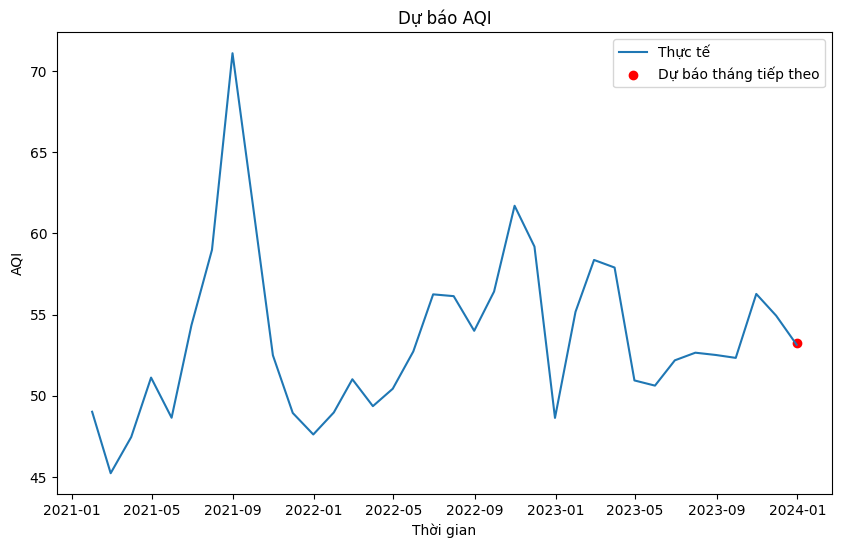

In [5]:
#du doan thang 1/2024
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Đọc dữ liệu
file_path = 'NDS_AIR.csv'
data = pd.read_csv(file_path)

# Chuyển đổi cột 'date_recorded' thành kiểu datetime
data['date_recorded'] = pd.to_datetime(data['date_recorded'])
filtered_data = data[['date_recorded', 'aqi']].drop_duplicates().dropna()

# Gộp dữ liệu theo tháng
monthly_data = filtered_data.set_index('date_recorded').resample('ME').mean()

# Chuẩn hóa dữ liệu
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(monthly_data)

# Tạo tập dữ liệu chuỗi thời gian
def create_dataset(data, look_back=12):
    X, y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:i + look_back, 0])
        y.append(data[i + look_back, 0])
    return np.array(X), np.array(y)

look_back = 12
X, y = create_dataset(scaled_data, look_back)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Xây dựng mô hình LSTM
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(look_back, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(1))

# Biên dịch mô hình
model.compile(optimizer='adam', loss='mean_squared_error')

# Huấn luyện mô hình
model.fit(X, y, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Dự báo cho tháng tiếp theo
last_data = scaled_data[-look_back:]
last_data = last_data.reshape(1, look_back, 1)
predicted_next_month = model.predict(last_data)

# Chuyển đổi giá trị dự báo về thang đo ban đầu
predicted_next_month = scaler.inverse_transform(predicted_next_month)

# Kết quả dự báo
print(f"Dự báo AQI cho tháng 1/2024: {predicted_next_month[0, 0]:.2f}")

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.plot(monthly_data.index, scaler.inverse_transform(scaled_data), label='Thực tế')
plt.scatter(monthly_data.index[-1], predicted_next_month[0, 0], color='r', marker='o', label='Dự báo tháng tiếp theo')
plt.title('Dự báo AQI')
plt.xlabel('Thời gian')
plt.ylabel('AQI')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.1698 - val_loss: 0.1188
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.1585 - val_loss: 0.1071
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.1475 - val_loss: 0.0958
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.1368 - val_loss: 0.0847
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - loss: 0.1262 - val_loss: 0.0740
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 0.1157 - val_loss: 0.0635
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - loss: 0.1054 - val_loss: 0.0534
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - loss: 0.0953 - val_loss: 0.0437
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 0.0854 - val_loss: 0.0347
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - loss: 0.0759 - val_loss: 0.0264
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 0.0668 - val_loss: 0.0190
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.0584 - val_loss: 0.0130

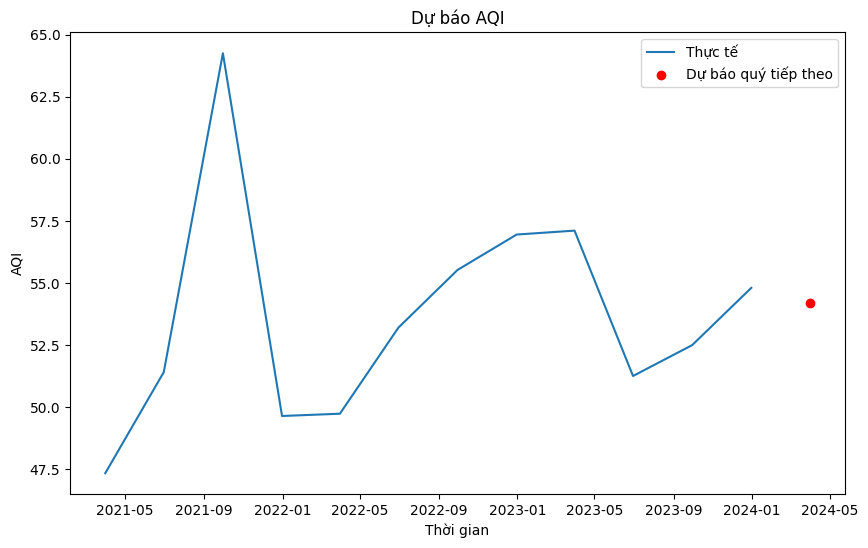

In [2]:


import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Đọc dữ liệu
file_path = 'NDS_AIR.csv'
data = pd.read_csv(file_path)

# Chuyển đổi cột 'date_recorded' thành kiểu datetime
data['date_recorded'] = pd.to_datetime(data['date_recorded'])
filtered_data = data[['date_recorded', 'aqi']].drop_duplicates().dropna()

# Gộp dữ liệu theo quý
quarterly_data = filtered_data.set_index('date_recorded').resample('QE').mean()

# Chuẩn hóa dữ liệu
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(quarterly_data)

# Tạo tập dữ liệu chuỗi thời gian
def create_dataset(data, look_back=4):
    X, y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:i + look_back, 0])
        y.append(data[i + look_back, 0])
    return np.array(X), np.array(y)

look_back = 4
X, y = create_dataset(scaled_data, look_back)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Xây dựng mô hình LSTM
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(look_back, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(1))

# Biên dịch mô hình
model.compile(optimizer='adam', loss='mean_squared_error')

# Huấn luyện mô hình
model.fit(X, y, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Dự báo cho quý tiếp theo (Quý 1/2024)
last_data = scaled_data[-look_back:]
last_data = last_data.reshape(1, look_back, 1)
predicted_next_quarter = model.predict(last_data)

# Chuyển đổi giá trị dự báo về thang đo ban đầu
predicted_next_quarter = scaler.inverse_transform(predicted_next_quarter)

# Kết quả dự báo
print(f"Dự báo AQI cho quý 1/2024: {predicted_next_quarter[0, 0]:.2f}")

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.plot(quarterly_data.index, scaler.inverse_transform(scaled_data), label='Thực tế')
plt.scatter(quarterly_data.index[-1] + pd.DateOffset(months=3), predicted_next_quarter[0, 0], color='r', marker='o', label='Dự báo quý tiếp theo')
plt.title('Dự báo AQI')
plt.xlabel('Thời gian')
plt.ylabel('AQI')
plt.legend()
plt.show()